In [2]:
# Import random shit
import numpy as np
import matplotlib.pyplot as plt

# Get that yum yum sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer as TFT

# Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

In [3]:
# Load our data and shit
train_data = np.loadtxt('./training_data.txt', skiprows=1, delimiter=' ')
test_data = np.loadtxt('./test_data.txt', skiprows=1, delimiter=' ')

In [4]:
# Split training and test set into x and y
scaler = TFT()

x_train = scaler.fit_transform(train_data[:, 1:])
y_train = train_data[:, 0]

x_test = scaler.transform(test_data)

In [8]:
params = {'C':[2]}

svc_clf = SVC(kernel='rbf')
ss = ShuffleSplit(n_splits=2, test_size=1/2)

clf = GridSearchCV(svc_clf, params, cv=ss, n_jobs=1, verbose=50)

clf.fit(x_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.504, total= 3.9min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min remaining:    0.0s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.506, total= 4.6min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 12.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 12.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=None, test_size=0.5, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=50)

In [14]:
clf = SVC(C=2, probability=True)
clf.fit(x_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
SVM = clf.predict(x_test)
SVM_probs = clf.predict_proba(x_test)

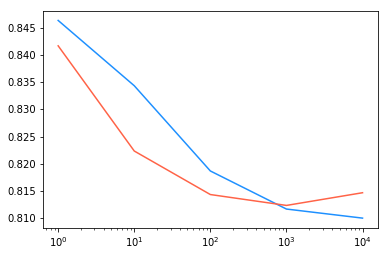

In [7]:
C = [1, 10, 100, 1000, 10000]

rbf = np.array([[0.853, 0.844, 0.842], [0.830, 0.838, 0.835], [0.812, 0.821, 0.823],
                [0.805, 0.815, 0.815], [0.805, 0.811, 0.814]])
sig = np.array([[0.837, 0.848, 0.840], [0.823, 0.821, 0.823], [0.814, 0.815, 0.814],
                [0.812, 0.812, 0.813], [0.813, 0.817, 0.814]])

plt.figure()
plt.semilogx(C, np.mean(rbf, axis=1), color='dodgerblue')
plt.semilogx(C, np.mean(sig, axis=1), color='tomato')

In [19]:
np.savetxt('SVM_probs.txt', SVM_probs)
convert(SVM, 'SVM.txt')

In [17]:
def convert(y_test, filename):
    """
    Converts the y_test vector to submission file and saves to filename
    
    Inputs:
        y_test: A (N, ) array with the predicted results for the test set
        filename: String name of file
        
    Outputs:
        None
    """
    
    text_file = np.array([[i+1, int(y_test[i])] for i in range(len(y_test))])
    np.savetxt(filename, text_file, fmt='%d', delimiter=',')
    
    f = open(filename,'r+')
    lines = f.readlines() # read old content
    f.seek(0) # go back to the beginning of the file
    f.write('Id,Prediction\n') # write new content at the beginning
    for line in lines: # write old content after new
        f.write(line)
    f.close()